<a href="https://colab.research.google.com/github/GOPIKA-S-S/DL_lab/blob/main/2348518_DL_lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
# 1. Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [18]:
# 2.Load the dataset
df=pd.read_csv('/content/creditcard.csv')

DATA PREPROCESSING

In [19]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [20]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
65448,51589,-0.248790,1.080973,-0.917017,-0.976831,3.234594,2.963384,0.673578,0.509785,-0.674202,...,-0.160001,-0.482385,-0.326914,0.885378,0.220774,0.300600,-0.277872,-0.146796,0.76,0.0
65449,51589,1.130476,0.090195,0.358313,0.579876,-0.413699,-0.873547,0.192253,-0.105390,-0.005114,...,-0.438925,-1.421174,0.310895,0.353704,-0.083121,-0.015829,-0.046818,0.021914,42.90,0.0
65450,51590,1.298511,0.103767,0.026676,0.239810,0.066831,-0.021495,-0.125705,0.066416,-0.000780,...,-0.292495,-0.919318,-0.009714,-0.866837,0.313025,0.152421,-0.040222,-0.004856,1.98,0.0
65451,51591,-1.062891,0.242080,2.425183,1.125829,-1.284732,1.535764,-0.524604,1.074866,0.627453,...,0.194731,0.719323,0.072734,0.042001,0.060638,-0.254387,0.012123,0.010512,113.65,0.0
65452,51591,1.251499,0.352835,-0.173985,1.057454,0.345146,-0.366959,0.446715,-0.292922,-0.083856,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,65453.000000,65453.000000,65453.000000,65453.000000,65453.000000,65453.000000,65453.000000,65453.000000,65453.000000,65453.000000,...,65452.000000,65452.000000,65452.000000,65452.000000,65452.000000,65452.000000,65452.000000,65452.000000,65452.000000,65452.000000
mean,33429.846867,-0.240575,-0.012987,0.684068,0.171729,-0.266835,0.103221,-0.113163,0.059434,0.037196,...,-0.028511,-0.106841,-0.039098,0.005598,0.136732,0.019958,0.002181,0.004243,96.276149,0.002582
std,14078.168886,1.857128,1.649806,1.426716,1.378742,1.388857,1.306443,1.254939,1.223332,1.170955,...,0.729616,0.637402,0.603012,0.596708,0.439030,0.497424,0.381480,0.322063,270.242777,0.050749
min,0.000000,-56.407510,-72.715728,-32.965346,-5.172595,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,...,-34.830382,-10.933144,-26.751119,-2.836627,-7.495741,-2.534330,-8.567638,-9.617915,0.000000,0.000000
25%,27748.000000,-1.000865,-0.585921,0.197913,-0.723647,-0.884703,-0.636487,-0.602981,-0.142531,-0.662885,...,-0.226897,-0.526780,-0.179573,-0.326243,-0.127572,-0.329428,-0.062871,-0.005887,7.680000,0.000000
50%,36941.000000,-0.243460,0.075028,0.774169,0.189237,-0.298678,-0.148843,-0.073032,0.065169,-0.057666,...,-0.062061,-0.081680,-0.051837,0.061257,0.174456,-0.076200,0.009404,0.022739,26.220000,0.000000
75%,43906.000000,1.153819,0.730504,1.408066,1.054661,0.272863,0.495135,0.422151,0.342671,0.695866,...,0.114460,0.308386,0.078933,0.402812,0.423146,0.296759,0.082485,0.076182,88.122500,0.000000
max,51591.000000,1.960497,18.183626,4.226108,16.715537,34.801666,22.529298,36.677268,20.007208,10.392889,...,22.614889,10.503090,17.297845,4.014444,5.525093,3.517346,11.135740,33.847808,19656.530000,1.000000


In [22]:
df.shape

(65453, 31)

In [23]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [24]:
df.fillna(0,inplace=True)
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

scaling the data

In [25]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Define the numerical features to be scaled
numerical_features = ['Time','Amount']

# Fit and transform the scaler on the training data
df[numerical_features] = scaler.fit_transform(df[numerical_features])





There is no categorical values are in the data set so no need to perform encoding

Train test split

In [26]:
from sklearn.model_selection import train_test_split

# Assuming 'df' contains your preprocessed DataFrame with features and target variable
X = df.drop('Class', axis=1)  # Features
y = df['Class']  # Target variable

# Split the dataset into training and testing sets with an 80-20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the input shape
input_shape = X_train.shape[1]  # Number of features in the input data

# Initialize the sequential model
model = keras.Sequential()

# Add the input layer
model.add(layers.Dense(64, activation='relu', input_shape=(input_shape,)))

# Add additional hidden layers
model.add(layers.Dense(64, activation='relu'))  # Example additional hidden layer

# Add the output layer
model.add(layers.Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [34]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

input_shape = X_train.shape[1]  # Number of features in the input data


# Training the model with different optimization algorithms and learning rates
# 1: RMSprop optimizer with a different learning rate
model_rmsprop = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(input_shape,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model_rmsprop.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
history_rmsprop = model_rmsprop.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# 2: Adam optimizer with a different learning rate
model_adam = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(input_shape,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model_adam.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
history_adam = model_adam.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
1637/1637 [==============================] - 4s 3ms/step - loss: 5.2315e-04 - accuracy: 0.9998 - val_loss: 0.0204 - val_accuracy: 0.9992
Epoch 2/10
1637/1637 [==============================] - 4s 2ms/step - loss: 3.2039e-04 - accuracy: 0.9999 - val_loss: 0.0210 - val_accuracy: 0.9991
Epoch 3/10
1637/1637 [==============================] - 4s 2ms/step - loss: 5.0642e-04 - accuracy: 0.9999 - val_loss: 0.0247 - val_accuracy: 0.9992
Epoch 4/10
1637/1637 [==============================] - 5s 3ms/step - loss: 7.5455e-04 - accuracy: 0.9998 - val_loss: 0.0182 - val_accuracy: 0.9992
Epoch 5/10
1637/1637 [==============================] - 4s 2ms/step - loss: 4.4240e-04 - accuracy: 0.9999 - val_loss: 0.0204 - val_accuracy: 0.9990
Epoch 6/10
1637/1637 [==============================] - 4s 2ms/step - loss: 5.4190e-04 - accuracy: 0.9998 - val_loss: 0.0239 - val_accuracy: 0.9991
Epoch 7/10
1637/1637 [==============================] - 5s 3ms/step - loss: 8.7191e-04 - accuracy: 0.9998 - val_

In [36]:
from sklearn import metrics
# Predict the labels for the test set of rmsprop
y_pred_rms = model_rmsprop.predict(X_test)
# Predict the labels for the test set of adam
y_pred_adam = model_adam.predict(X_test)

# Convert predicted probabilities to class predictions
class_predictions_r = (y_pred_rms > 0.5).astype(int)
class_predictions_a = (y_pred_adam > 0.5).astype(int)

# Now use class_predictions for evaluating the metrics of rmsprop
accuracy1 = metrics.accuracy_score(y_test, class_predictions_r)
precision1, recall1, f1_score1, _ = metrics.precision_recall_fscore_support(y_test, class_predictions_r, average='binary')
roc_auc1= metrics.roc_auc_score(y_test, class_predictions_r)

# Now use class_predictions for evaluating the metrics of adam
accuracy2 = metrics.accuracy_score(y_test, class_predictions_a)
precision2, recall2, f1_score2, _ = metrics.precision_recall_fscore_support(y_test, class_predictions_a, average='binary')
roc_auc2 = metrics.roc_auc_score(y_test, class_predictions_a)


410/410 [==============================] - 1s 3ms/step


[0.9993125047742724, 0.9285714285714286, 0.7878787878787878, 0.8524590163934426, 0.8938628125333593]
[0.9987777862653732, 0.84, 0.6363636363636364, 0.7241379310344828, 0.8180286553697489]
Evaluation metrics of model with RMS prop optimizer


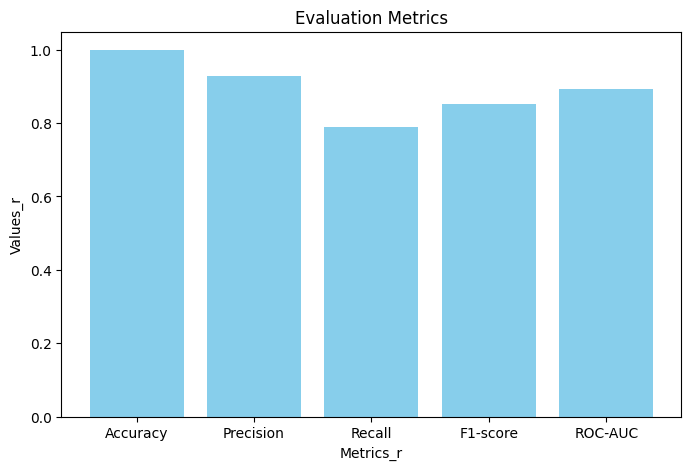

Evaluation metrics of model with adam optimizer


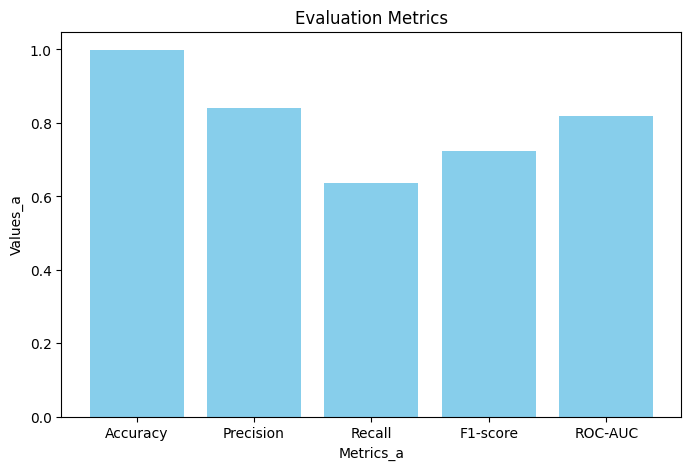

In [39]:
# Create a bar plot to visualize the evaluation metrics
import matplotlib.pyplot as plt

# Define the evaluation metrics and their respective values
metrics_r= ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC']
values_r = [accuracy1, precision1, recall1, f1_score1, roc_auc1]
print(values_r)

# Define the evaluation metrics and their respective values
metrics_a= ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC']
values_a = [accuracy2, precision2, recall2, f1_score2, roc_auc2]
print(values_a)
print("Evaluation metrics of model with RMS prop optimizer")
# Create a bar plot
plt.figure(figsize=(8, 5))
plt.bar(metrics_r, values_r, color='skyblue')
plt.xlabel('Metrics_r')
plt.ylabel('Values_r')
plt.title('Evaluation Metrics')
plt.show()

print("Evaluation metrics of model with adam optimizer")
# Create a bar plot
plt.figure(figsize=(8, 5))
plt.bar(metrics_a, values_a, color='skyblue')
plt.xlabel('Metrics_a')
plt.ylabel('Values_a')
plt.title('Evaluation Metrics')
plt.show()


confusion metrics of model with rms optimizer


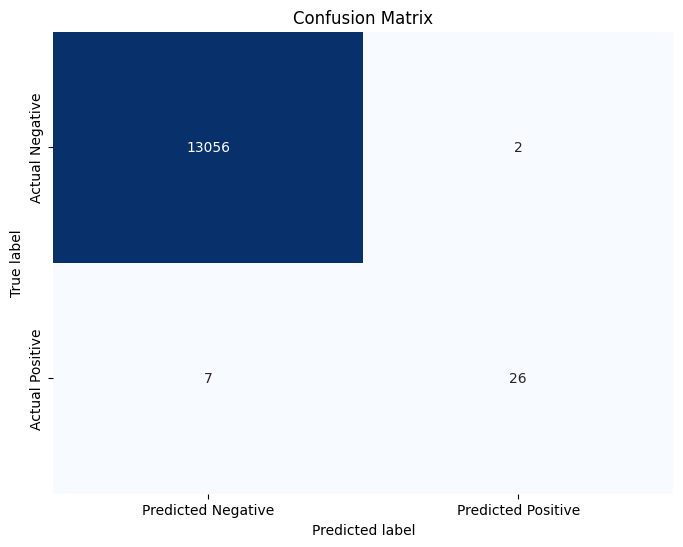

confusion metrics of model with adam optimizer


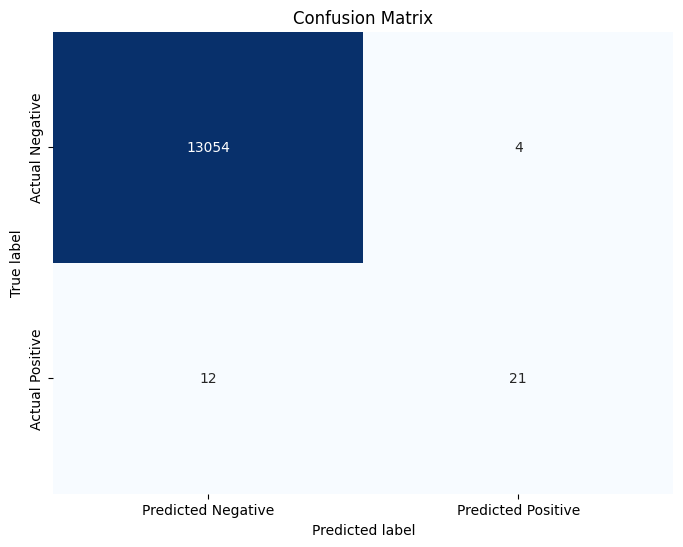

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix for rms
conf_matrix_r = confusion_matrix(y_test, class_predictions_r)
print("confusion metrics of model with rms optimizer")
# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_r, annot=True, cmap='Blues', fmt='g', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()



# Calculate the confusion matrix for adam
conf_matrix_a = confusion_matrix(y_test, class_predictions_a)

print("confusion metrics of model with adam optimizer")
# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_a, annot=True, cmap='Blues', fmt='g', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

precision recall curve

precision-recall curve for rms


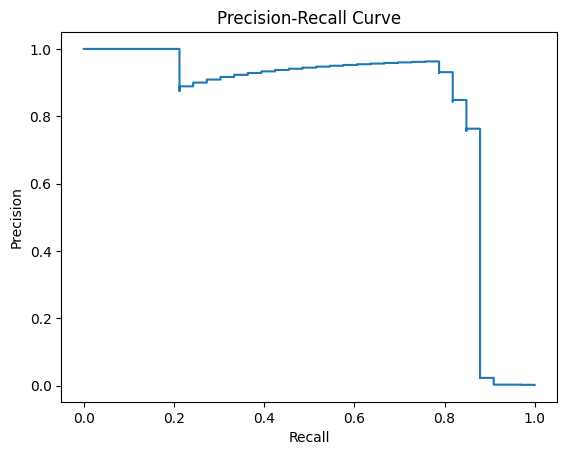

precision-recall curve for adam


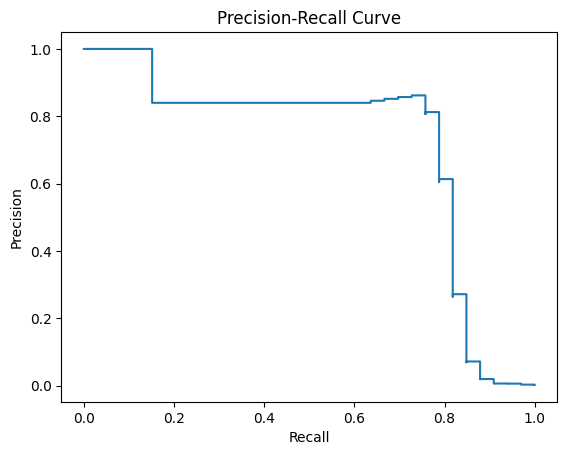

In [44]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

# Calculate precision and recall for rms
precision1, recall1, _ = precision_recall_curve(y_test, y_pred_rms)
print("precision-recall curve for rms")
# Display the precision-recall curve
disp = PrecisionRecallDisplay(precision=precision1, recall=recall1)
disp.plot()
plt.title('Precision-Recall Curve')
plt.show()

# Calculate precision and recall for adam
precision2, recall2, _ = precision_recall_curve(y_test, y_pred_adam)
print("precision-recall curve for adam")
# Display the precision-recall curve
disp = PrecisionRecallDisplay(precision=precision2, recall=recall2)
disp.plot()
plt.title('Precision-Recall Curve')
plt.show()